In [290]:
import requests
from bs4 import BeautifulSoup
import re
import nltk
from nltk import word_tokenize
import csv
from collections import Counter
import string
import pandas as pd
from openpyxl import Workbook
import os
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [291]:
files = os.listdir(os.getcwd())
files_txt = [f for f in files if f[-3:] == 'txt']
files_txt

['are1q23.txt',
 'bxp1q23.txt',
 'cold1q23.txt',
 'cuz1q23.txt',
 'dlr1q23.txt',
 'eqix1q23.txt',
 'eqr1q23.txt',
 'exr1q23.txt',
 'hr1q23.txt',
 'invh1q23.txt',
 'kim1q23.txt',
 'krc1q23.txt',
 'maa1q23.txt',
 'o1q23.txt',
 'pld2q23.txt',
 'psa1q23.txt',
 'reg1q23.txt',
 'vtr1q23.txt']

In [292]:
names = []
for name in files_txt:
    names.append(name[:-8])
names

['are',
 'bxp',
 'cold',
 'cuz',
 'dlr',
 'eqix',
 'eqr',
 'exr',
 'hr',
 'invh',
 'kim',
 'krc',
 'maa',
 'o',
 'pld',
 'psa',
 'reg',
 'vtr']

In [293]:
def open_file(file):
    with open(file, "r") as f:
        contents = f.read()
    return contents

In [294]:
def word_list(text, remove_stop_words=True):
    word_list = []
    remove_words = []
    if remove_stop_words:
        remove_words = ['oh', 'like', 'well', 'just', 'basically', 'actually', 'so', 'right', 'okay', 'alright', 'um', 'yeah', 'pretty']
        stop_words = set(stopwords.words('english'))
        for word in list(stop_words):
            remove_words.append(word)
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = re.sub(r'\d+', '', text)
    for word in word_tokenize(text.lower()):
        if word not in remove_words:
            word = WordNetLemmatizer().lemmatize(word)
            word_list.append(word)
    return word_list

In [295]:
text_list = []
for file in files_txt:
    text = open_file(file).split('Earnings Call\n\nPresentation')[1].replace('\n','').split('This transcript may not be 100 percent')[0].strip()
    text_list.append(word_list(text))
text_list

[['operator',
  'good',
  'day',
  'welcome',
  'alexandria',
  'real',
  'estate',
  'equity',
  'first',
  'quarter',
  'conference',
  'call',
  'participant',
  'listenonly',
  'mode',
  'operator',
  'instruction',
  'please',
  'note',
  'event',
  'recorded',
  'would',
  'turn',
  'conference',
  'paula',
  'schwartz',
  'investor',
  'relation',
  'please',
  'go',
  'ahead',
  'paula',
  'schwartz',
  'investor',
  'relation',
  'thank',
  'good',
  'afternoon',
  'everyone',
  'conference',
  'call',
  'contains',
  'forwardlooking',
  'statement',
  'within',
  'meaning',
  'federal',
  'security',
  'law',
  'company',
  'actual',
  'result',
  'might',
  'differ',
  'materially',
  'projected',
  'forwardlooking',
  'statement',
  'additional',
  'information',
  'concerning',
  'factor',
  'could',
  'cause',
  'actual',
  'result',
  'differ',
  'materially',
  'forwardlooking',
  'statement',
  'contained',
  'company',
  'periodic',
  'report',
  'filed',
  'security'

In [296]:
def get_pos_neg_words():
    def get_words(url):
        import requests
        words = requests.get(url, verify=False).content.decode('latin-1')
        word_list = words.split('\n')
        index = 0
        while index < len(word_list):
            word = word_list[index]
            if ';' in word or not word:
                word_list.pop(index)
            else:
                index+=1
        return word_list
    p_url = 'http://ptrckprry.com/course/ssd/data/positive-words.txt'
    n_url = 'http://ptrckprry.com/course/ssd/data/negative-words.txt'
    positive_words = get_words(p_url)
    negative_words = get_words(n_url)
    return positive_words,negative_words

In [297]:
def sentiment_analysis_unique(word_list):
    pos_words, neg_words = get_pos_neg_words()
    pos = set()
    neg = set()
    for word in word_list:
        if word in pos_words:
            if word not in pos:
                pos.add(word)
        if word in neg_words:
            if word not in neg:
                neg.add(word)
    return pos, len(pos), neg, len(neg)

In [298]:
#Lists and unique numbers of positive & negative words
pos_neg = []
for text in text_list:
    pos_neg.append(sentiment_analysis_unique(text))
pos_neg

C:\Users\aa04124\AppData\Local\Continuum\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1045: InsecureRequestWarning: Unverified HTTPS request is being made to host 'ptrckprry.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\aa04124\AppData\Local\Continuum\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1045: InsecureRequestWarning: Unverified HTTPS request is being made to host 'ptrckprry.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\aa04124\AppData\Local\Continuum\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1045: InsecureRequestWarning: Unverified HTTPS request is being made to host 'ptrckprry.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  w

C:\Users\aa04124\AppData\Local\Continuum\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1045: InsecureRequestWarning: Unverified HTTPS request is being made to host 'ptrckprry.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\aa04124\AppData\Local\Continuum\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1045: InsecureRequestWarning: Unverified HTTPS request is being made to host 'ptrckprry.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\aa04124\AppData\Local\Continuum\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1045: InsecureRequestWarning: Unverified HTTPS request is being made to host 'ptrckprry.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  w

[({'abundance',
   'advanced',
   'advantage',
   'amazing',
   'ambitious',
   'appreciable',
   'appreciate',
   'appreciated',
   'approval',
   'astounding',
   'attractive',
   'available',
   'award',
   'benefit',
   'best',
   'better',
   'capability',
   'clear',
   'clearly',
   'comfortable',
   'competitive',
   'confidence',
   'consistent',
   'contribution',
   'cornerstone',
   'correct',
   'decent',
   'deference',
   'diligence',
   'distinction',
   'diversified',
   'easy',
   'engaging',
   'enjoyed',
   'enough',
   'exceeded',
   'excellence',
   'excellent',
   'exceptional',
   'extraordinarily',
   'extraordinary',
   'fair',
   'fairly',
   'fantastic',
   'fast',
   'flexibility',
   'fortunate',
   'free',
   'gain',
   'good',
   'great',
   'guidance',
   'healthy',
   'helpful',
   'important',
   'impressed',
   'improve',
   'improved',
   'improvement',
   'innovation',
   'innovative',
   'integrated',
   'interesting',
   'judicious',
   'lead',
 

In [299]:
def sentiment_analysis_total(word_list):
    pos_words, neg_words = get_pos_neg_words()
    pos = []
    neg = []
    for word in word_list:
        if word in pos_words:
            pos.append(word)
        if word in neg_words:
            neg.append(word)
    return pos, len(pos), round(len(pos)/len(word_list)*100,2), neg, len(neg), round(len(neg)/len(word_list)*100,2)

In [300]:
#Lists and total numbers and percentages of positive & negative words
pos_neg2 = []
for text in text_list:
    pos_neg2.append(sentiment_analysis_total(text))
pos_neg2

C:\Users\aa04124\AppData\Local\Continuum\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1045: InsecureRequestWarning: Unverified HTTPS request is being made to host 'ptrckprry.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\aa04124\AppData\Local\Continuum\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1045: InsecureRequestWarning: Unverified HTTPS request is being made to host 'ptrckprry.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\aa04124\AppData\Local\Continuum\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1045: InsecureRequestWarning: Unverified HTTPS request is being made to host 'ptrckprry.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  w

C:\Users\aa04124\AppData\Local\Continuum\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1045: InsecureRequestWarning: Unverified HTTPS request is being made to host 'ptrckprry.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\aa04124\AppData\Local\Continuum\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1045: InsecureRequestWarning: Unverified HTTPS request is being made to host 'ptrckprry.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\aa04124\AppData\Local\Continuum\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1045: InsecureRequestWarning: Unverified HTTPS request is being made to host 'ptrckprry.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  w

[(['good',
   'welcome',
   'thank',
   'good',
   'thank',
   'welcome',
   'thank',
   'strong',
   'tough',
   'tough',
   'pleased',
   'trusted',
   'award',
   'integrated',
   'unparalleled',
   'excellence',
   'protect',
   'talent',
   'rich',
   'abundance',
   'safe',
   'excellent',
   'innovation',
   'innovation',
   'work',
   'great',
   'progress',
   'tough',
   'tough',
   'solid',
   'stability',
   'strong',
   'guidance',
   'solid',
   'strong',
   'appreciate',
   'successfully',
   'judicious',
   'strong',
   'progress',
   'thank',
   'good',
   'innovation',
   'work',
   'significant',
   'support',
   'integrated',
   'work',
   'best',
   'trust',
   'strong',
   'significant',
   'free',
   'sensitive',
   'strong',
   'strong',
   'healthy',
   'innovative',
   'patient',
   'personalized',
   'promising',
   'innovation',
   'ambitious',
   'approval',
   'promising',
   'stellar',
   'clear',
   'cornerstone',
   'innovation',
   'support',
   'stron

In [301]:
def word_count(word_list):
    pos_word_list = sentiment_analysis_total(word_list)[0]
    neg_word_list = sentiment_analysis_total(word_list)[3]
    pos_top = sorted(Counter(pos_word_list).items(), key=lambda x: x[1], reverse=True)
    neg_top = sorted(Counter(neg_word_list).items(), key=lambda x: x[1], reverse=True)
    return pos_top, neg_top

In [302]:
#Lists of unique positive & negative words with their count
count = []
for text in text_list:
    count.append(word_count(text))
count

C:\Users\aa04124\AppData\Local\Continuum\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1045: InsecureRequestWarning: Unverified HTTPS request is being made to host 'ptrckprry.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\aa04124\AppData\Local\Continuum\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1045: InsecureRequestWarning: Unverified HTTPS request is being made to host 'ptrckprry.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\aa04124\AppData\Local\Continuum\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1045: InsecureRequestWarning: Unverified HTTPS request is being made to host 'ptrckprry.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  w

C:\Users\aa04124\AppData\Local\Continuum\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1045: InsecureRequestWarning: Unverified HTTPS request is being made to host 'ptrckprry.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\aa04124\AppData\Local\Continuum\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1045: InsecureRequestWarning: Unverified HTTPS request is being made to host 'ptrckprry.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\aa04124\AppData\Local\Continuum\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1045: InsecureRequestWarning: Unverified HTTPS request is being made to host 'ptrckprry.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  w

C:\Users\aa04124\AppData\Local\Continuum\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1045: InsecureRequestWarning: Unverified HTTPS request is being made to host 'ptrckprry.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\aa04124\AppData\Local\Continuum\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1045: InsecureRequestWarning: Unverified HTTPS request is being made to host 'ptrckprry.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\aa04124\AppData\Local\Continuum\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1045: InsecureRequestWarning: Unverified HTTPS request is being made to host 'ptrckprry.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  w

[([('strong', 34),
   ('good', 26),
   ('thank', 22),
   ('great', 14),
   ('significant', 12),
   ('guidance', 10),
   ('work', 9),
   ('rich', 7),
   ('helpful', 7),
   ('excellence', 6),
   ('excellent', 6),
   ('innovation', 6),
   ('progress', 6),
   ('appreciate', 6),
   ('competitive', 6),
   ('gain', 6),
   ('fairly', 6),
   ('tough', 5),
   ('best', 5),
   ('better', 5),
   ('attractive', 5),
   ('comfortable', 5),
   ('solid', 4),
   ('support', 4),
   ('approval', 4),
   ('important', 4),
   ('trusted', 3),
   ('clear', 3),
   ('improvement', 3),
   ('timely', 3),
   ('reasonably', 3),
   ('clearly', 3),
   ('welcome', 2),
   ('pleased', 2),
   ('integrated', 2),
   ('abundance', 2),
   ('judicious', 2),
   ('free', 2),
   ('patient', 2),
   ('promising', 2),
   ('fast', 2),
   ('prudence', 2),
   ('skilled', 2),
   ('contribution', 2),
   ('benefit', 2),
   ('consistent', 2),
   ('exceptional', 2),
   ('fair', 2),
   ('impressed', 2),
   ('willing', 2),
   ('enough', 2),
  

In [14]:
def save_file(file_name, word_list):
    with pd.ExcelWriter(file_name, engine='openpyxl') as writer:
        wb = writer.book
        pd.DataFrame(sentiment_analysis_unique(word_list)[0]).to_excel(writer, sheet_name='Sheet1', index=False)
        worksheet1 = wb['Sheet1']
        worksheet1.title = 'List of Positive Words'
        worksheet1['A1'] = 'Word'
        worksheet1['C1'] = 'Number of Unique Positive Words'
        worksheet1['C2'] = sentiment_analysis_unique(word_list)[1]
        worksheet1['C4'] = 'Number of All Positive Words'
        worksheet1['C5'] = sentiment_analysis_total(word_list)[1]
        worksheet1['C7'] = 'Percentage of Positive Words'+
        worksheet1['C8'] = sentiment_analysis_total(word_list)[2]
        pd.DataFrame(sentiment_analysis_unique(word_list)[2]).to_excel(writer, sheet_name='Sheet2', index=False)
        worksheet2 = wb['Sheet2']
        worksheet2.title = 'List of Negative Words'
        worksheet2['A1'] = 'Word'
        worksheet2['C1'] = 'Number of Unique Negative Words'
        worksheet2['C2'] = sentiment_analysis_unique(word_list)[3]
        worksheet2['C4'] = 'Number of All Negative Words'
        worksheet2['C5'] = sentiment_analysis_total(word_list)[4]
        worksheet2['C7'] = 'Percentage of Negative Words'
        worksheet2['C8'] = sentiment_analysis_total(word_list)[5]
        pd.DataFrame(word_count(word_list)[0]).to_excel(writer, sheet_name='Sheet3', index=False)
        worksheet3 = wb['Sheet3']
        worksheet3.title = 'List of Positive Words and Count'
        worksheet3['A1'] = 'Word'
        worksheet3['B1'] = 'Count'
        pd.DataFrame(word_count(word_list)[1]).to_excel(writer, sheet_name='Sheet4', index=False)
        worksheet4 = wb['Sheet4']
        worksheet4.title = 'List of Negative Words and Count'
        worksheet4['A1'] = 'Word'
        worksheet4['B1'] = 'Count'
        pd.DataFrame(word_count(word_list)[0][:10]).to_excel(writer, sheet_name='Sheet5', index=False)
        worksheet5 = wb['Sheet5']
        worksheet5.title = 'Top 10 Positive Words and Count'
        worksheet5['A1'] = 'Word'
        worksheet5['B1'] = 'Count'
        pd.DataFrame(word_count(word_list)[1][:10]).to_excel(writer, sheet_name='Sheet6', index=False)
        worksheet6 = wb['Sheet6']
        worksheet6.title = 'Top 10 Negative Words and Count'
        worksheet6['A1'] = 'Word'
        worksheet6['B1'] = 'Count'
        writer.save()
    return f"Output saved to '{file_name}' successfully."

In [15]:
for index, name in enumerate(names):
    if name == 'pld':
        file_name = name + '2q23.xlsx'
    else:
        file_name = name + '1q23.xlsx'
    save_file(file_name, text_list[index])

C:\Users\aa04124\AppData\Local\Continuum\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1045: InsecureRequestWarning: Unverified HTTPS request is being made to host 'ptrckprry.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\aa04124\AppData\Local\Continuum\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1045: InsecureRequestWarning: Unverified HTTPS request is being made to host 'ptrckprry.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\aa04124\AppData\Local\Continuum\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1045: InsecureRequestWarning: Unverified HTTPS request is being made to host 'ptrckprry.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  w

C:\Users\aa04124\AppData\Local\Continuum\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1045: InsecureRequestWarning: Unverified HTTPS request is being made to host 'ptrckprry.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\aa04124\AppData\Local\Continuum\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1045: InsecureRequestWarning: Unverified HTTPS request is being made to host 'ptrckprry.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\aa04124\AppData\Local\Continuum\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1045: InsecureRequestWarning: Unverified HTTPS request is being made to host 'ptrckprry.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  w

C:\Users\aa04124\AppData\Local\Continuum\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1045: InsecureRequestWarning: Unverified HTTPS request is being made to host 'ptrckprry.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\aa04124\AppData\Local\Continuum\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1045: InsecureRequestWarning: Unverified HTTPS request is being made to host 'ptrckprry.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\aa04124\AppData\Local\Continuum\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1045: InsecureRequestWarning: Unverified HTTPS request is being made to host 'ptrckprry.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  w

C:\Users\aa04124\AppData\Local\Continuum\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1045: InsecureRequestWarning: Unverified HTTPS request is being made to host 'ptrckprry.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\aa04124\AppData\Local\Continuum\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1045: InsecureRequestWarning: Unverified HTTPS request is being made to host 'ptrckprry.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\aa04124\AppData\Local\Continuum\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1045: InsecureRequestWarning: Unverified HTTPS request is being made to host 'ptrckprry.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  w

C:\Users\aa04124\AppData\Local\Continuum\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1045: InsecureRequestWarning: Unverified HTTPS request is being made to host 'ptrckprry.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\aa04124\AppData\Local\Continuum\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1045: InsecureRequestWarning: Unverified HTTPS request is being made to host 'ptrckprry.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\aa04124\AppData\Local\Continuum\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1045: InsecureRequestWarning: Unverified HTTPS request is being made to host 'ptrckprry.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  w

C:\Users\aa04124\AppData\Local\Continuum\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1045: InsecureRequestWarning: Unverified HTTPS request is being made to host 'ptrckprry.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\aa04124\AppData\Local\Continuum\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1045: InsecureRequestWarning: Unverified HTTPS request is being made to host 'ptrckprry.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\aa04124\AppData\Local\Continuum\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1045: InsecureRequestWarning: Unverified HTTPS request is being made to host 'ptrckprry.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  w

C:\Users\aa04124\AppData\Local\Continuum\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1045: InsecureRequestWarning: Unverified HTTPS request is being made to host 'ptrckprry.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\aa04124\AppData\Local\Continuum\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1045: InsecureRequestWarning: Unverified HTTPS request is being made to host 'ptrckprry.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\aa04124\AppData\Local\Continuum\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1045: InsecureRequestWarning: Unverified HTTPS request is being made to host 'ptrckprry.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  w

C:\Users\aa04124\AppData\Local\Continuum\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1045: InsecureRequestWarning: Unverified HTTPS request is being made to host 'ptrckprry.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\aa04124\AppData\Local\Continuum\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1045: InsecureRequestWarning: Unverified HTTPS request is being made to host 'ptrckprry.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\aa04124\AppData\Local\Continuum\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1045: InsecureRequestWarning: Unverified HTTPS request is being made to host 'ptrckprry.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  w

C:\Users\aa04124\AppData\Local\Continuum\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1045: InsecureRequestWarning: Unverified HTTPS request is being made to host 'ptrckprry.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\aa04124\AppData\Local\Continuum\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1045: InsecureRequestWarning: Unverified HTTPS request is being made to host 'ptrckprry.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\aa04124\AppData\Local\Continuum\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1045: InsecureRequestWarning: Unverified HTTPS request is being made to host 'ptrckprry.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  w

C:\Users\aa04124\AppData\Local\Continuum\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1045: InsecureRequestWarning: Unverified HTTPS request is being made to host 'ptrckprry.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\aa04124\AppData\Local\Continuum\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1045: InsecureRequestWarning: Unverified HTTPS request is being made to host 'ptrckprry.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\aa04124\AppData\Local\Continuum\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1045: InsecureRequestWarning: Unverified HTTPS request is being made to host 'ptrckprry.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  w

C:\Users\aa04124\AppData\Local\Continuum\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1045: InsecureRequestWarning: Unverified HTTPS request is being made to host 'ptrckprry.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\aa04124\AppData\Local\Continuum\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1045: InsecureRequestWarning: Unverified HTTPS request is being made to host 'ptrckprry.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\aa04124\AppData\Local\Continuum\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1045: InsecureRequestWarning: Unverified HTTPS request is being made to host 'ptrckprry.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  w

C:\Users\aa04124\AppData\Local\Continuum\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1045: InsecureRequestWarning: Unverified HTTPS request is being made to host 'ptrckprry.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\aa04124\AppData\Local\Continuum\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1045: InsecureRequestWarning: Unverified HTTPS request is being made to host 'ptrckprry.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\aa04124\AppData\Local\Continuum\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1045: InsecureRequestWarning: Unverified HTTPS request is being made to host 'ptrckprry.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  w

C:\Users\aa04124\AppData\Local\Continuum\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1045: InsecureRequestWarning: Unverified HTTPS request is being made to host 'ptrckprry.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\aa04124\AppData\Local\Continuum\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1045: InsecureRequestWarning: Unverified HTTPS request is being made to host 'ptrckprry.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\aa04124\AppData\Local\Continuum\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1045: InsecureRequestWarning: Unverified HTTPS request is being made to host 'ptrckprry.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  w

C:\Users\aa04124\AppData\Local\Continuum\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1045: InsecureRequestWarning: Unverified HTTPS request is being made to host 'ptrckprry.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\aa04124\AppData\Local\Continuum\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1045: InsecureRequestWarning: Unverified HTTPS request is being made to host 'ptrckprry.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\aa04124\AppData\Local\Continuum\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1045: InsecureRequestWarning: Unverified HTTPS request is being made to host 'ptrckprry.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  w

C:\Users\aa04124\AppData\Local\Continuum\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1045: InsecureRequestWarning: Unverified HTTPS request is being made to host 'ptrckprry.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\aa04124\AppData\Local\Continuum\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1045: InsecureRequestWarning: Unverified HTTPS request is being made to host 'ptrckprry.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\aa04124\AppData\Local\Continuum\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1045: InsecureRequestWarning: Unverified HTTPS request is being made to host 'ptrckprry.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  w

C:\Users\aa04124\AppData\Local\Continuum\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1045: InsecureRequestWarning: Unverified HTTPS request is being made to host 'ptrckprry.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\aa04124\AppData\Local\Continuum\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1045: InsecureRequestWarning: Unverified HTTPS request is being made to host 'ptrckprry.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\aa04124\AppData\Local\Continuum\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1045: InsecureRequestWarning: Unverified HTTPS request is being made to host 'ptrckprry.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  w

C:\Users\aa04124\AppData\Local\Continuum\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1045: InsecureRequestWarning: Unverified HTTPS request is being made to host 'ptrckprry.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\aa04124\AppData\Local\Continuum\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1045: InsecureRequestWarning: Unverified HTTPS request is being made to host 'ptrckprry.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\aa04124\AppData\Local\Continuum\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1045: InsecureRequestWarning: Unverified HTTPS request is being made to host 'ptrckprry.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  w

C:\Users\aa04124\AppData\Local\Continuum\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1045: InsecureRequestWarning: Unverified HTTPS request is being made to host 'ptrckprry.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\aa04124\AppData\Local\Continuum\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1045: InsecureRequestWarning: Unverified HTTPS request is being made to host 'ptrckprry.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\aa04124\AppData\Local\Continuum\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1045: InsecureRequestWarning: Unverified HTTPS request is being made to host 'ptrckprry.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  w

C:\Users\aa04124\AppData\Local\Continuum\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1045: InsecureRequestWarning: Unverified HTTPS request is being made to host 'ptrckprry.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\aa04124\AppData\Local\Continuum\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1045: InsecureRequestWarning: Unverified HTTPS request is being made to host 'ptrckprry.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\aa04124\AppData\Local\Continuum\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1045: InsecureRequestWarning: Unverified HTTPS request is being made to host 'ptrckprry.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  w

C:\Users\aa04124\AppData\Local\Continuum\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1045: InsecureRequestWarning: Unverified HTTPS request is being made to host 'ptrckprry.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\aa04124\AppData\Local\Continuum\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1045: InsecureRequestWarning: Unverified HTTPS request is being made to host 'ptrckprry.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\aa04124\AppData\Local\Continuum\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1045: InsecureRequestWarning: Unverified HTTPS request is being made to host 'ptrckprry.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  w

C:\Users\aa04124\AppData\Local\Continuum\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1045: InsecureRequestWarning: Unverified HTTPS request is being made to host 'ptrckprry.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\aa04124\AppData\Local\Continuum\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1045: InsecureRequestWarning: Unverified HTTPS request is being made to host 'ptrckprry.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\aa04124\AppData\Local\Continuum\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1045: InsecureRequestWarning: Unverified HTTPS request is being made to host 'ptrckprry.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  w

C:\Users\aa04124\AppData\Local\Continuum\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1045: InsecureRequestWarning: Unverified HTTPS request is being made to host 'ptrckprry.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\aa04124\AppData\Local\Continuum\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1045: InsecureRequestWarning: Unverified HTTPS request is being made to host 'ptrckprry.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\aa04124\AppData\Local\Continuum\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1045: InsecureRequestWarning: Unverified HTTPS request is being made to host 'ptrckprry.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  w

C:\Users\aa04124\AppData\Local\Continuum\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1045: InsecureRequestWarning: Unverified HTTPS request is being made to host 'ptrckprry.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\aa04124\AppData\Local\Continuum\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1045: InsecureRequestWarning: Unverified HTTPS request is being made to host 'ptrckprry.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\aa04124\AppData\Local\Continuum\Anaconda3\lib\site-packages\urllib3\connectionpool.py:1045: InsecureRequestWarning: Unverified HTTPS request is being made to host 'ptrckprry.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  w

In [244]:
#Top 10 most common positive words across all earning calls
word_sum = {}
for call in count:
    for word, freq in call[0]:
        if word in word_sum:
            word_sum[word] += freq
        else:
            word_sum[word] = freq
total_pos = sorted(word_sum.items(), key=lambda x: x[1], reverse=True)[:10]
total_pos

[('thank', 400),
 ('good', 393),
 ('strong', 219),
 ('great', 203),
 ('guidance', 190),
 ('work', 109),
 ('better', 103),
 ('significant', 99),
 ('positive', 80),
 ('benefit', 69)]

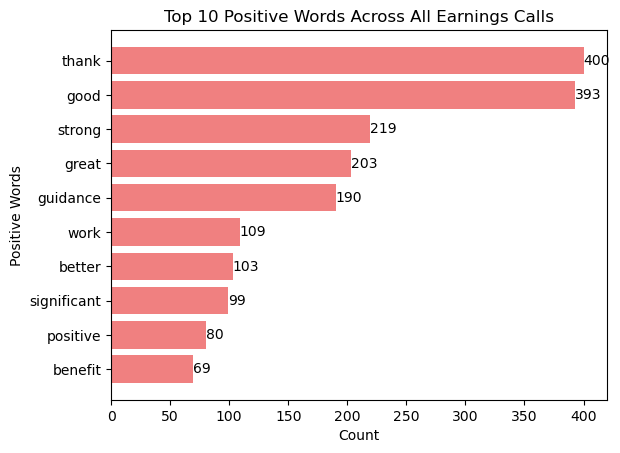

In [245]:
# Sort the data in descending order by values
sorted_data = sorted(total_pos, key=lambda x: x[1], reverse=False)

# Extract sorted keys and values from the sorted data
words = [item[0] for item in sorted_data]
frequencies = [item[1] for item in sorted_data]

# Plotting the horizontal bar graph
plt.barh(words, frequencies, color='lightcoral')

# Adding labels and title
plt.xlabel('Count')
plt.ylabel('Positive Words')
plt.title('Top 10 Positive Words Across All Earnings Calls')

# Adding number labels to the bars
for i in range(len(words)):
    plt.text(frequencies[i], i, str(frequencies[i]), ha='left', va='center')

# Displaying the bar graph
plt.show()

In [246]:
#Top 10 most common negative words across all earning calls
word_sum = {}
for call in count:
    for word, freq in call[1]:
        if word in word_sum:
            word_sum[word] += freq
        else:
            word_sum[word] = freq
total_neg = sorted(word_sum.items(), key=lambda x: x[1], reverse=True)[:10]
total_neg

[('vice', 227),
 ('debt', 149),
 ('risk', 63),
 ('inaudible', 53),
 ('bad', 40),
 ('issue', 35),
 ('negative', 33),
 ('hard', 28),
 ('concession', 26),
 ('challenging', 24)]

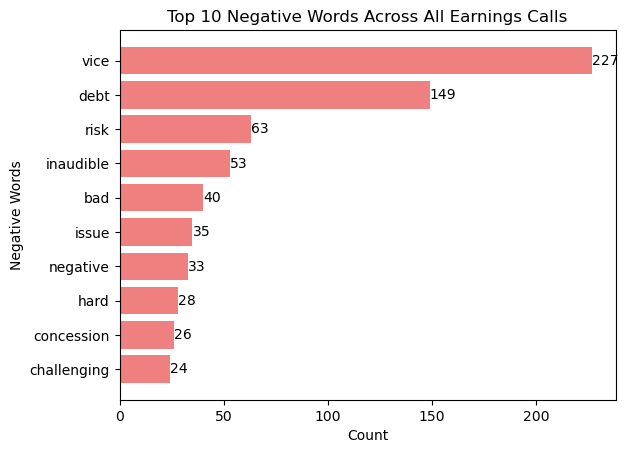

In [247]:
# Sort the data in descending order by values
sorted_data = sorted(total_neg, key=lambda x: x[1], reverse=False)

# Extract sorted keys and values from the sorted data
words = [item[0] for item in sorted_data]
frequencies = [item[1] for item in sorted_data]

# Plotting the horizontal bar graph
plt.barh(words, frequencies, color='lightcoral')

# Adding labels and title
plt.xlabel('Count')
plt.ylabel('Negative Words')
plt.title('Top 10 Negative Words Across All Earnings Calls')

# Adding number labels to the bars
for i in range(len(words)):
    plt.text(frequencies[i], i, str(frequencies[i]), ha='left', va='center')

# Displaying the bar graph
plt.show()

In [248]:
#Number of unique positive and negative words
pos_unique = []
neg_unique = []
for call in pos_neg:
    pos_unique.append(call[1])
    neg_unique.append(call[3])
print(pos_unique)
print(neg_unique)

[123, 96, 88, 95, 108, 103, 105, 67, 91, 100, 91, 124, 83, 103, 82, 90, 103, 97]
[62, 42, 33, 41, 40, 44, 66, 34, 19, 51, 43, 58, 44, 39, 44, 24, 50, 18]


In [249]:
#Number of total positive and negative words and percentages
pos_total = []
pos_per = []
neg_total = []
neg_per = []
for call in pos_neg2:
    pos_total.append(call[1])
    pos_per.append(call[2])
    neg_total.append(call[4])
    neg_per.append(call[5])
print(pos_total)
print(pos_per)
print(neg_total)
print(neg_per)

[359, 250, 238, 259, 308, 309, 329, 159, 207, 273, 241, 308, 291, 249, 193, 227, 323, 300]
[5.42, 4.74, 5.41, 6.33, 5.75, 5.54, 5.12, 5.39, 5.37, 5.88, 5.67, 5.67, 5.42, 5.49, 4.43, 6.57, 6.15, 7.08]
[102, 83, 67, 103, 65, 92, 161, 72, 39, 119, 101, 124, 142, 70, 70, 51, 139, 50]
[1.54, 1.57, 1.52, 2.52, 1.21, 1.65, 2.51, 2.44, 1.01, 2.56, 2.38, 2.28, 2.64, 1.54, 1.61, 1.48, 2.65, 1.18]


In [250]:
df = pd.DataFrame(data = {'Earnings Call':names,
                          'Number of Unique Positive Words':pos_unique,
                          'Number of All Positive Words':pos_total,
                          'Percentage of Positive Words':pos_per,
                          'Number of Unique Negative Words':neg_unique,
                          'Number of All Negative Words':neg_total,
                          'Percentage of Negative Words':neg_per})
df

,Earnings Call,Number of Unique Positive Words,Number of All Positive Words,Percentage of Positive Words,Number of Unique Negative Words,Number of All Negative Words,Percentage of Negative Words
0,are,123,359,5.42,62,102,1.54
1,bxp,96,250,4.74,42,83,1.57
2,cold,88,238,5.41,33,67,1.52
3,cuz,95,259,6.33,41,103,2.52
4,dlr,108,308,5.75,40,65,1.21
5,eqix,103,309,5.54,44,92,1.65
6,eqr,105,329,5.12,66,161,2.51
7,exr,67,159,5.39,34,72,2.44
8,hr,91,207,5.37,19,39,1.01
9,invh,100,273,5.88,51,119,2.56


In [251]:
#Findings across all earning calls for positive words
print('Total Number of Unique Positive Words:', sum(pos_unique))
print('Total Number of All Positive Words:', sum(pos_total))
print('Average Number of Unique Positive Words:', round(sum(pos_unique)/len(pos_unique),2))
print('Average Number of All Positive Words:', round(sum(pos_total)/len(pos_total),2))
print('Average Percentage of Positive Words:', round(sum(pos_per)/len(pos_per),2))

Total Number of Unique Positive Words: 1749
Total Number of All Positive Words: 4823
Average Number of Unique Positive Words: 97.17
Average Number of All Positive Words: 267.94
Average Percentage of Positive Words: 5.63


In [252]:
#Findings across all earning calls for negative words
print('Total Number of Unique Negative Words:', sum(neg_unique))
print('Total Number of All Negative Words:', sum(neg_total))
print('Average Number of Unique Negative Words:', round(sum(neg_unique)/len(neg_unique),2))
print('Average Number of All Negative Words:', round(sum(neg_total)/len(neg_total),2))
print('Average Percentage of Negative Words:', round(sum(neg_per)/len(neg_per),2))

Total Number of Unique Negative Words: 752
Total Number of All Negative Words: 1650
Average Number of Unique Negative Words: 41.78
Average Number of All Negative Words: 91.67
Average Percentage of Negative Words: 1.91


In [303]:
def find_words(word_list, specific_word):
    result = []
    indices = [i for i, x in enumerate(word_list) if x == specific_word]
    for i in indices:
        result.append(word_list[max(0, i-2):min(len(word_list), i+3)])
    return result

In [304]:
#Text list with stop words
text_list = []
for file in files_txt:
    text = open_file(file).split('Earnings Call\n\nPresentation')[1].replace('\n','').split('This transcript may not be 100 percent')[0].strip()
    text_list.append(word_list(text, remove_stop_words=False))
text_list

[['operator',
  'good',
  'day',
  'and',
  'welcome',
  'to',
  'the',
  'alexandria',
  'real',
  'estate',
  'equity',
  'first',
  'quarter',
  'conference',
  'call',
  'all',
  'participant',
  'will',
  'be',
  'in',
  'a',
  'listenonly',
  'mode',
  'operator',
  'instruction',
  'please',
  'note',
  'this',
  'event',
  'is',
  'being',
  'recorded',
  'i',
  'would',
  'now',
  'like',
  'to',
  'turn',
  'the',
  'conference',
  'over',
  'to',
  'paula',
  'schwartz',
  'with',
  'investor',
  'relation',
  'please',
  'go',
  'ahead',
  'paula',
  'schwartz',
  'investor',
  'relation',
  'thank',
  'you',
  'and',
  'good',
  'afternoon',
  'everyone',
  'this',
  'conference',
  'call',
  'contains',
  'forwardlooking',
  'statement',
  'within',
  'the',
  'meaning',
  'of',
  'the',
  'federal',
  'security',
  'law',
  'the',
  'company',
  'actual',
  'result',
  'might',
  'differ',
  'materially',
  'from',
  'those',
  'projected',
  'in',
  'the',
  'forwardloo

In [305]:
#List of positive words that appear
p = []
for pos in pos_neg:
    p.append(pos[0])
pos = {k: v for k, v in zip(names, p)}
find_pos = []
for i in range(len(names)):
    find_pos.append(list(pos.values())[i])
find_pos

[{'abundance',
  'advanced',
  'advantage',
  'amazing',
  'ambitious',
  'appreciable',
  'appreciate',
  'appreciated',
  'approval',
  'astounding',
  'attractive',
  'available',
  'award',
  'benefit',
  'best',
  'better',
  'capability',
  'clear',
  'clearly',
  'comfortable',
  'competitive',
  'confidence',
  'consistent',
  'contribution',
  'cornerstone',
  'correct',
  'decent',
  'deference',
  'diligence',
  'distinction',
  'diversified',
  'easy',
  'engaging',
  'enjoyed',
  'enough',
  'exceeded',
  'excellence',
  'excellent',
  'exceptional',
  'extraordinarily',
  'extraordinary',
  'fair',
  'fairly',
  'fantastic',
  'fast',
  'flexibility',
  'fortunate',
  'free',
  'gain',
  'good',
  'great',
  'guidance',
  'healthy',
  'helpful',
  'important',
  'impressed',
  'improve',
  'improved',
  'improvement',
  'innovation',
  'innovative',
  'integrated',
  'interesting',
  'judicious',
  'lead',
  'leading',
  'leverage',
  'liked',
  'loyalty',
  'maturity',
 

In [306]:
#List of negative words that appear
n = []
for neg in pos_neg:
    n.append(neg[2])
neg = {k: v for k, v in zip(names, n)}
find_neg = []
for i in range(len(names)):
    find_neg.append(list(neg.values())[i])
find_neg

[{'abuse',
  'aggressive',
  'bad',
  'break',
  'broken',
  'cancer',
  'challenging',
  'chronic',
  'cloud',
  'collapse',
  'concerned',
  'conservative',
  'contend',
  'crisis',
  'critical',
  'debt',
  'delay',
  'delaying',
  'desperation',
  'difficult',
  'difficulty',
  'discriminate',
  'expensive',
  'fabrication',
  'fail',
  'failure',
  'falling',
  'gross',
  'hard',
  'havoc',
  'heck',
  'illness',
  'inefficiency',
  'instability',
  'issue',
  'lack',
  'limit',
  'limited',
  'lost',
  'lumpy',
  'missed',
  'nervous',
  'onerous',
  'reckless',
  'risk',
  'shortage',
  'sickness',
  'slowed',
  'slower',
  'solemn',
  'sorry',
  'stall',
  'suspect',
  'trouble',
  'unable',
  'unusual',
  'vice',
  'volatile',
  'volatility',
  'waste',
  'weakness',
  'worse'},
 {'breaking',
  'bulky',
  'challenging',
  'cheap',
  'complex',
  'crisis',
  'critical',
  'dearth',
  'debt',
  'declining',
  'demolish',
  'difficult',
  'excuse',
  'failure',
  'false',
  'fear

In [307]:
def five_words_list(list_):
    d = {}
    for n, s, t in zip(names, list_, text_list):
        l = []
        for w in s:
            l.extend(find_words(t, w))
        d[n] = l
    return d

In [308]:
five_words_list(find_pos)

{'are': [['maintained', 'strong', 'guidance', 'while', 'lowering'],
  ['our', 'disposition', 'guidance', 'with', 'that'],
  ['turning', 'to', 'guidance', 'we', 'updated'],
  ['our', 'underlying', 'guidance', 'assumption', 'for'],
  ['midpoint', 'of', 'guidance', 'down', 'from'],
  ['range', 'of', 'guidance', 'for', 'eps'],
  ['for', 'initial', 'guidance', 'for', 'investor'],
  ['in', 'our', 'guidance', 'we', 'just'],
  ['range', 'of', 'guidance', 'it', 'sits'],
  ['leasing', 'spread', 'guidance', 'what', 'wa'],
  ['continue', 'to', 'refine', 'our', 'plan'],
  ['abundance', 'and', 'easy', 'capital', 'that'],
  ['new', 'drug', 'approval', 'by', 'which'],
  ['continued', 'fda', 'approval', 'and', 'ha'],
  ['for', 'fda', 'approval', 'review', 'which'],
  ['novel', 'fda', 'approval', 'to', 'end'],
  ['medicine', 'to', 'patient', 'this', 'month'],
  ['value', 'to', 'patient', 'and', 'investor'],
  ['base', 'of', 'robust', 'and', 'highly'],
  ['generator', 'an', 'astounding', 'week', 'longer'

In [309]:
five_words_list(find_neg)

{'are': [['due', 'to', 'lost', 'economic', 'productivity'],
  ['kind', 'of', 'lost', 'the', 'lease'],
  ['kind', 'of', 'lost', 'some', 'of'],
  ['institution', 'either', 'falling', 'out', 'or'],
  ['kuhn', 'senior', 'vice', 'president', 'science'],
  ['kuhn', 'senior', 'vice', 'president', 'of'],
  ['driven', 'by', 'instability', 'of', 'regional'],
  ['go', 'to', 'waste', 'while', 'this'],
  ['driving', 'these', 'delay', 'are', 'chip'],
  ['with', 'these', 'delay', 'and', 'associated'],
  ['is', 'fairly', 'reckless', 'investing', 'joel'],
  ['due', 'to', 'shortage', 'of', 'raw'],
  ['to', 'labor', 'shortage', 'cost', 'of'],
  ['increase', 'a', 'shortage', 'of', 'worker'],
  ['are', 'chip', 'shortage', 'and', 'demand'],
  ['of', 'these', 'shortage', 'and', 'paired'],
  ['good', 'it', 'slower', 'than', 'it'],
  ['almost', 'thats', 'hard', 'to', 'do'],
  ['to', 'look', 'hard', 'a', 'i'],
  ['thats', 'a', 'hard', 'question', 'to'],
  ['it', 'so', 'hard', 'to', 'handicap'],
  ['following', 

In [310]:
def opposite_meaning(word_dict, word_list):
    result = {}
    for key, value in word_dict.items():
        for list_ in value:
            for word in list_:
                if word.lower() in word_list:
                    if len(list_) >= 3:
                        result.setdefault(key, []).append((list_[2], word))
                        break  
    return result

In [311]:
find_pos_words = ['not', 'isnt', 'hasnt', 'cant', 'cannot', 'no', 'bad', 'badly']

In [312]:
find_neg_words = ['not', 'isnt', 'hasnt', 'cant', 'cannot', 'no']

In [313]:
p1 = opposite_meaning(five_words_list(find_pos), find_pos_words)
p1

{'are': [('appreciable', 'not'),
  ('maturity', 'no'),
  ('significant', 'no'),
  ('helpful', 'no'),
  ('work', 'not'),
  ('win', 'not'),
  ('great', 'no')],
 'bxp': [('assurance', 'no'), ('competitive', 'not')],
 'cold': [('guidance', 'not'), ('guidance', 'not'), ('efficiently', 'not')],
 'cuz': [('maturity', 'not'),
  ('significant', 'no'),
  ('significant', 'not'),
  ('well', 'not')],
 'dlr': [('appreciate', 'no'), ('meaningful', 'not'), ('top', 'not')],
 'eqix': [('maturity', 'no'), ('meaningful', 'no')],
 'eqr': [('guidance', 'not'),
  ('promising', 'not'),
  ('significant', 'no'),
  ('good', 'not'),
  ('good', 'not')],
 'exr': [('efficiently', 'not'),
  ('helpful', 'no'),
  ('good', 'isnt'),
  ('enough', 'cant')],
 'hr': [('contribution', 'no'), ('work', 'no'), ('reconcile', 'cant')],
 'invh': [('regard', 'bad'), ('great', 'isnt')],
 'kim': [('resilient', 'not'), ('benefit', 'no')],
 'krc': [('regard', 'no'),
  ('maturity', 'no'),
  ('appreciate', 'no'),
  ('significant', 'no'),


In [314]:
n1 = opposite_meaning(five_words_list(find_neg), find_neg_words)
n1

{'are': [('illness', 'not'),
  ('debt', 'no'),
  ('broken', 'not'),
  ('lumpy', 'not'),
  ('fail', 'no'),
  ('fail', 'not'),
  ('fail', 'not'),
  ('concerned', 'not')],
 'cold': [('unfortunately', 'cant'), ('concerned', 'not')],
 'cuz': [('dead', 'not'), ('rejected', 'not'), ('debt', 'no')],
 'dlr': [('implication', 'not'), ('alienate', 'not')],
 'eqix': [('suffer', 'not'), ('worried', 'not')],
 'eqr': [('layoff', 'isnt'), ('downside', 'not')],
 'exr': [('problem', 'no'), ('restrict', 'not')],
 'invh': [('debt', 'no'), ('debt', 'not'), ('doubt', 'no'), ('bad', 'not')],
 'krc': [('debt', 'no'), ('doubt', 'no'), ('slowed', 'no')],
 'maa': [('doubt', 'no'), ('concession', 'no')],
 'o': [('debt', 'no')],
 'pld': [('difficult', 'no'),
  ('unusual', 'not'),
  ('tank', 'not'),
  ('unusually', 'not')],
 'reg': [('risky', 'not'),
  ('debt', 'no'),
  ('inaudible', 'no'),
  ('afraid', 'not'),
  ('afraid', 'not')],
 'vtr': [('disruptive', 'not')]}

In [315]:
def count_opposite_words(word_dict):
    result = {}
    for key, value in word_dict.items():
        count = {}
        for first, second in value:
            count[second] = count.get(second, 0) + 1
        result[key] = count
    return result

In [316]:
p2 = count_opposite_words(p1)
p2

{'are': {'not': 3, 'no': 4},
 'bxp': {'no': 1, 'not': 1},
 'cold': {'not': 3},
 'cuz': {'not': 3, 'no': 1},
 'dlr': {'no': 1, 'not': 2},
 'eqix': {'no': 2},
 'eqr': {'not': 4, 'no': 1},
 'exr': {'not': 1, 'no': 1, 'isnt': 1, 'cant': 1},
 'hr': {'no': 2, 'cant': 1},
 'invh': {'bad': 1, 'isnt': 1},
 'kim': {'not': 1, 'no': 1},
 'krc': {'no': 4, 'cant': 1, 'not': 2},
 'maa': {'not': 4},
 'pld': {'not': 8, 'no': 1},
 'psa': {'not': 1},
 'reg': {'not': 4, 'no': 3, 'cant': 1, 'bad': 1}}

In [317]:
n2 = count_opposite_words(n1)
n2

{'are': {'not': 6, 'no': 2},
 'cold': {'cant': 1, 'not': 1},
 'cuz': {'not': 2, 'no': 1},
 'dlr': {'not': 2},
 'eqix': {'not': 2},
 'eqr': {'isnt': 1, 'not': 1},
 'exr': {'no': 1, 'not': 1},
 'invh': {'no': 2, 'not': 2},
 'krc': {'no': 3},
 'maa': {'no': 2},
 'o': {'no': 1},
 'pld': {'no': 1, 'not': 3},
 'reg': {'not': 3, 'no': 2},
 'vtr': {'not': 1}}

In [318]:
opp_pos = []
for tup in p1.values():
    for first, second in tup:
        opp_pos.append(first)
dict(sorted(Counter(opp_pos).items(), key=lambda x: (-x[1], x[0])))

{'significant': 7,
 'maturity': 4,
 'appreciate': 3,
 'contribution': 3,
 'good': 3,
 'guidance': 3,
 'helpful': 3,
 'meaningful': 3,
 'benefit': 2,
 'clearly': 2,
 'efficiently': 2,
 'enough': 2,
 'great': 2,
 'promising': 2,
 'regard': 2,
 'work': 2,
 'accomplished': 1,
 'appreciable': 1,
 'assurance': 1,
 'better': 1,
 'competitive': 1,
 'confident': 1,
 'dynamic': 1,
 'free': 1,
 'guarantee': 1,
 'improve': 1,
 'reconcile': 1,
 'resilient': 1,
 'smart': 1,
 'strong': 1,
 'success': 1,
 'sufficient': 1,
 'thank': 1,
 'top': 1,
 'well': 1,
 'win': 1,
 'wise': 1,
 'worth': 1}

In [319]:
opp_neg = []
for tup in n1.values():
    for first, second in tup:
        opp_neg.append(first)
dict(sorted(Counter(opp_neg).items(), key=lambda x: (-x[1], x[0])))

{'debt': 7,
 'doubt': 3,
 'fail': 3,
 'afraid': 2,
 'concerned': 2,
 'alienate': 1,
 'bad': 1,
 'broken': 1,
 'concession': 1,
 'dead': 1,
 'difficult': 1,
 'disruptive': 1,
 'downside': 1,
 'illness': 1,
 'implication': 1,
 'inaudible': 1,
 'layoff': 1,
 'lumpy': 1,
 'problem': 1,
 'rejected': 1,
 'restrict': 1,
 'risky': 1,
 'slowed': 1,
 'suffer': 1,
 'tank': 1,
 'unfortunately': 1,
 'unusual': 1,
 'unusually': 1,
 'worried': 1}

In [320]:
p_d = {}
for key, value in p2.items():
    p_d[key] = sum(value.values())
p_d

{'are': 7,
 'bxp': 2,
 'cold': 3,
 'cuz': 4,
 'dlr': 3,
 'eqix': 2,
 'eqr': 5,
 'exr': 4,
 'hr': 3,
 'invh': 2,
 'kim': 2,
 'krc': 7,
 'maa': 4,
 'pld': 9,
 'psa': 1,
 'reg': 9}

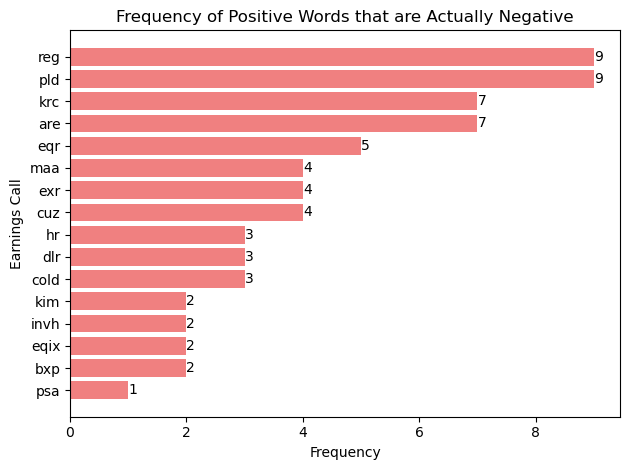

In [322]:
# Sort the data in descending order by values
sorted_data = dict(sorted(p_d.items(), key=lambda item: item[1], reverse=False))

# Extract sorted keys and values from the sorted data
names = list(sorted_data.keys())
values = list(sorted_data.values())

# Plotting the horizontal bar graph
plt.barh(names, values, color='lightcoral')

# Adding labels and title
plt.xlabel('Frequency')
plt.ylabel('Earnings Call')
plt.title('Frequency of Positive Words that are Actually Negative')

# Add number labels to the bars
for index, value in enumerate(values):
    plt.text(value, index, str(value), ha='left', va='center')
    
# Displaying the bar graph
plt.tight_layout()
plt.show()

In [321]:
n_d = {}
for key, value in n2.items():
    n_d[key] = sum(value.values())
n_d

{'are': 8,
 'cold': 2,
 'cuz': 3,
 'dlr': 2,
 'eqix': 2,
 'eqr': 2,
 'exr': 2,
 'invh': 4,
 'krc': 3,
 'maa': 2,
 'o': 1,
 'pld': 4,
 'reg': 5,
 'vtr': 1}

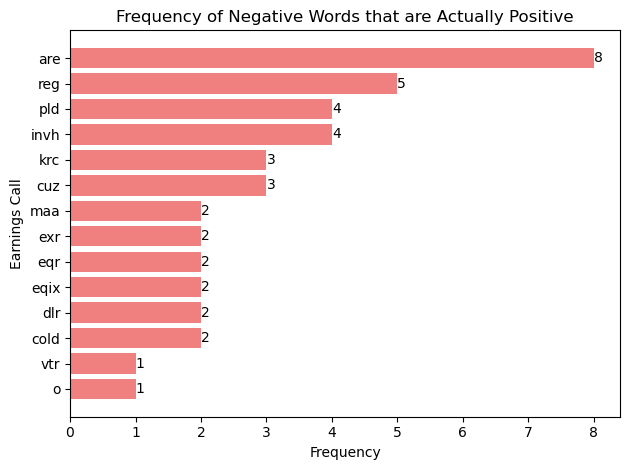

In [323]:
# Sort the data in descending order by values
sorted_data = dict(sorted(n_d.items(), key=lambda item: item[1], reverse=False))

# Extract sorted keys and values from the sorted data
names = list(sorted_data.keys())
values = list(sorted_data.values())

# Plotting the horizontal bar graph
plt.barh(names, values, color='lightcoral')

# Adding labels and title
plt.xlabel('Frequency')
plt.ylabel('Earnings Call')
plt.title('Frequency of Negative Words that are Actually Positive')

# Add number labels to the bars
for index, value in enumerate(values):
    plt.text(value, index, str(value), ha='left', va='center')
    
# Displaying the bar graph
plt.tight_layout()
plt.show()

In [324]:
print(sum(dict(sorted(Counter(opp_pos).items(), key=lambda x: (-x[1], x[0]))).values()))
print(sum(p_d.values()))
print(sum(dict(sorted(Counter(opp_neg).items(), key=lambda x: (-x[1], x[0]))).values()))
print(sum(n_d.values()))

67
67
41
41


In [332]:
print('Total Number of Positive Words that are Actually Negative:', sum(p_d.values()))
print('Percentage of Positive Words that are Actually Negative:', round(sum(p_d.values())/sum(pos_total)*100, 2))
print('Total Number of Negative Words that are Actually Positive:', sum(n_d.values()))
print('Percentage of Negative Words that are Actually Positive:', round(sum(n_d.values())/sum(neg_total)*100, 2))

Total Number of Positive Words that are Actually Negative: 67
Percentage of Positive Words that are Actually Negative: 1.39
Total Number of Negative Words that are Actually Positive: 41
Percentage of Negative Words that are Actually Positive: 2.48
